In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D 

In [3]:
Dataset = pd.read_csv('D:/UTPAL PHD/Tea leaf project/chlorophyll value/tea_leaf_750_image_modifiedd.csv')

In [4]:
Dataset.describe()

,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,variance,stddv_h,stddv_s,stddv_v,kurtosis,skewness,Chl Value
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,163.173775,167.120321,157.062333,43.778474,35.681186,57.174429,2364.988872,48.118899,69.688218,36.482912,7.118900,-2.180285,35.221067
std,36.154286,36.554225,35.788697,12.851595,10.540126,17.050112,1209.036924,10.794079,14.554460,11.228394,10.241016,1.698986,9.349187
min,2.259592,2.846533,1.241938,16.045376,12.751508,15.706908,251.771557,5.941523,2.954162,13.090083,-0.909649,-5.335713,9.000000
25%,154.771287,157.368650,149.996794,33.494795,27.720100,43.482843,1347.146488,42.623987,58.996057,28.023941,1.798585,-3.009312,29.200000
50%,170.668908,175.287528,164.782762,44.825860,35.475005,60.375722,2359.307752,49.706921,70.587980,36.002233,4.782312,-2.300531,34.250000
75%,181.489201,186.629348,174.744123,53.268765,42.832792,70.457058,3197.230915,54.690861,80.513912,43.716075,9.768074,-1.658798,39.600000
max,208.403165,212.272332,202.984726,75.522077,65.061582,89.811038,5790.713337,83.723033,103.071839,75.383485,156.224934,11.844060,73.700000


In [5]:
Dataset.head(10)

,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,variance,stddv_h,stddv_s,stddv_v,kurtosis,skewness,Chl Value
0,197.478471,203.192213,191.790658,55.235822,42.422848,68.479752,3201.722811,39.823970,65.016452,42.536723,2.693144,-2.003428,42.9
1,157.704656,161.870731,154.137681,52.779257,44.960307,61.544117,2874.905799,45.798970,72.509849,45.350869,1.417275,-1.547380,44.6
2,168.650369,172.254505,162.291823,55.136258,46.913445,64.705274,3159.514270,50.383784,72.455308,47.207545,1.618314,-1.658600,44.9
3,153.039775,155.967225,148.876568,53.016721,45.475238,61.839672,2909.436115,65.195754,76.502124,46.150734,1.320430,-1.581516,45.3
4,186.557493,190.859075,182.166241,59.816635,50.340256,70.457058,3704.717453,51.364393,70.523119,50.726218,2.146370,-1.901518,45.2
5,172.565066,178.314910,166.201175,69.045265,57.184191,80.395722,4858.062229,58.115633,81.877486,57.790797,0.138586,-1.380028,43.0
6,184.155285,190.669641,176.404890,68.522836,55.055247,81.613041,4829.714656,56.700919,77.134738,55.598282,0.308306,-1.428101,43.5
7,188.522623,198.130165,177.987543,63.491273,45.225953,82.498890,4361.867145,58.671915,82.276330,45.816013,0.721993,-1.485391,41.3
8,186.053256,194.747345,177.139563,64.144374,47.497803,80.697726,4345.896705,58.090442,79.072810,48.052989,0.599916,-1.475026,43.4
9,171.007430,176.438744,165.084787,68.583352,57.021176,79.692518,4790.161508,61.468170,80.032997,57.901486,0.091389,-1.348024,43.0


In [6]:
X = Dataset.iloc[:,:-1].values
Y = Dataset.iloc[:,-1].values

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [9]:
print(X_train.shape)

(1200, 12)


In [10]:
print(X_test.shape)

(300, 12)


In [16]:
from sklearn.svm import SVR
svr_regressor=SVR(kernel='linear',degree=1)
svr_regressor.fit(X_train, Y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=1, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [17]:
y_pred = svr_regressor.predict(X_test)

In [19]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df1 = df.head(20)

df1

,Actual,Predicted
0,33.6,34.482552
1,47.9,38.126167
2,38.6,37.583942
3,33.6,40.150513
4,38.3,36.083033
5,37.4,38.327261
6,33.3,33.114567
7,27.3,32.769636
8,35.6,33.772166
9,37.2,27.801557


Mean Absolute Error(MAE) 3.8218035380317823
Mean Squared Error(MSE) 25.852838723668853
Root Mean Squared Error(RMSE) 5.084568686100017
R Squared 0.704572798268063


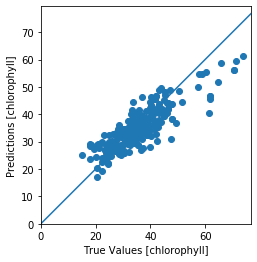

In [20]:
print ('Mean Absolute Error(MAE)',metrics.mean_absolute_error(Y_test, y_pred))
print ('Mean Squared Error(MSE)',metrics.mean_squared_error(Y_test, y_pred))
print ('Root Mean Squared Error(RMSE)',np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))     #test_size = 0.40
print('R Squared',metrics.r2_score(Y_test, y_pred))
plt.scatter(Y_test, y_pred)
plt.xlabel('True Values [chlorophyll]')
plt.ylabel('Predictions [chlorophyll]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])

_ = plt.plot([-100, 100], [-100, 100])
plt.savefig('D:/UTPAL PHD/Tea Leaf Journal Paper/Pic/SVR.png', dpi=450, bbox_inches='tight')

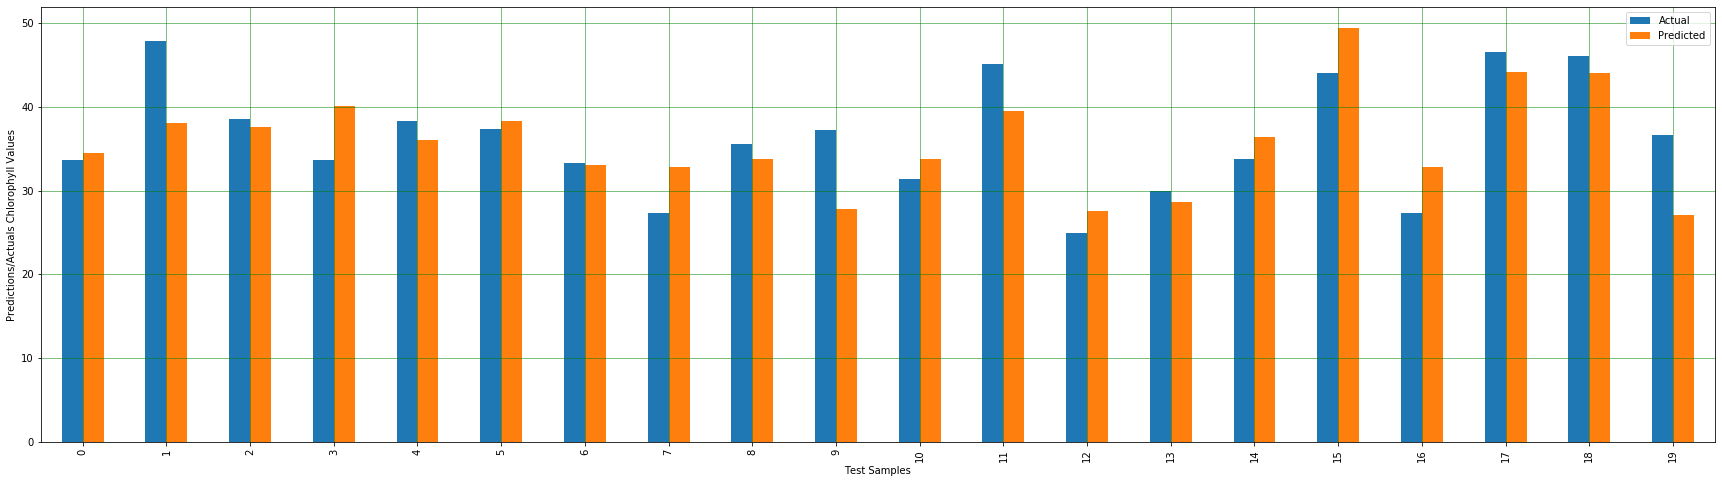

In [21]:
df1.plot(kind='bar',figsize=(30,8))
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.labelweight'] = 'bold'
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('Test Samples')
plt.ylabel('Predictions/Actuals Chlorophyll Values')
plt.savefig('D:/UTPAL PHD/Tea Leaf Journal Paper/Pic/SVR_predicted.png', dpi=450, bbox_inches='tight')
plt.show()

In [23]:
from sklearn.svm import SVR
svr_regressor=SVR(kernel='rbf',degree=1)
svr_regressor.fit(X_train, Y_train)

C:\Users\shanta kumar\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=1, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [24]:
y_pred = svr_regressor.predict(X_test)

Mean Absolute Error(MAE) 3.7281406603071976
Mean Squared Error(MSE) 26.938017471293655
Root Mean Squared Error(RMSE) 5.190184724197556
R Squared 0.6921721747150196


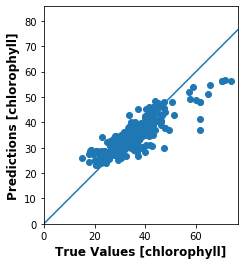

In [25]:
print ('Mean Absolute Error(MAE)',metrics.mean_absolute_error(Y_test, y_pred))
print ('Mean Squared Error(MSE)',metrics.mean_squared_error(Y_test, y_pred))
print ('Root Mean Squared Error(RMSE)',np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))     #test_size = 0.40
print('R Squared',metrics.r2_score(Y_test, y_pred))
plt.scatter(Y_test, y_pred)
plt.xlabel('True Values [chlorophyll]')
plt.ylabel('Predictions [chlorophyll]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])

_ = plt.plot([-100, 100], [-100, 100])
plt.savefig('D:/UTPAL PHD/Tea Leaf Journal Paper/Pic/SVR_rbf.png', dpi=450, bbox_inches='tight')

In [27]:
from sklearn.neighbors import KNeighborsRegressor 
for K in range(20):
    K = K+1
    neigh = KNeighborsRegressor(n_neighbors=K)
    neigh.fit(X_train, Y_train)

In [37]:
from sklearn.neighbors import KNeighborsRegressor                    #k=3
neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(X_train, Y_train)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [38]:
y_pred = neigh.predict(X_test) 

In [39]:

    print ('MAE value for k= ' , K , 'is:',metrics.mean_absolute_error(Y_test, y_pred))
    print ('MSE value for k= ' , K , 'is:',metrics.mean_squared_error(Y_test, y_pred))
    
    print ('RMSE value for k= ' , K , 'is:',np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))     
    
    print('R2 value for k= ' , K , 'is:',metrics.r2_score(Y_test, y_pred))


MAE value for k=  20 is: 2.7668888888888885
MSE value for k=  20 is: 14.989503703703697
RMSE value for k=  20 is: 3.8716280430464516
R2 value for k=  20 is: 0.8287109906239629


Mean Absolute Error(MAE) 2.7668888888888885
Mean Squared Error(MSE) 14.989503703703697
Root Mean Squared Error(RMSE) 3.8716280430464516
R Squared 0.8287109906239629


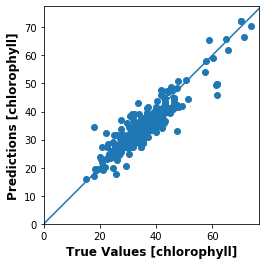

In [40]:
print ('Mean Absolute Error(MAE)',metrics.mean_absolute_error(Y_test, y_pred))
print ('Mean Squared Error(MSE)',metrics.mean_squared_error(Y_test, y_pred))
print ('Root Mean Squared Error(RMSE)',np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))     #test_size = 0.40
print('R Squared',metrics.r2_score(Y_test, y_pred))
plt.scatter(Y_test, y_pred)
plt.xlabel('True Values [chlorophyll]')
plt.ylabel('Predictions [chlorophyll]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])

_ = plt.plot([-100, 100], [-100, 100])
plt.savefig('D:/UTPAL PHD/Tea Leaf Journal Paper/Pic/KNN.png', dpi=450, bbox_inches='tight')

In [41]:
from sklearn.neighbors import KNeighborsRegressor                    #k=3
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train, Y_train)
y_pred = neigh.predict(X_test) 
print ('MAE value for k= ' , K , 'is:',metrics.mean_absolute_error(Y_test, y_pred))
print ('MSE value for k= ' , K , 'is:',metrics.mean_squared_error(Y_test, y_pred))
    
print ('RMSE value for k= ' , K , 'is:',np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))     
    
print('R2 value for k= ' , K , 'is:',metrics.r2_score(Y_test, y_pred))

MAE value for k=  20 is: 2.4004999999999996
MSE value for k=  20 is: 11.951641666666667
RMSE value for k=  20 is: 3.4571146447097565
R2 value for k=  20 is: 0.8634254407639346


In [42]:
from sklearn.neighbors import KNeighborsRegressor                    #k=3
neigh = KNeighborsRegressor(n_neighbors=4)
neigh.fit(X_train, Y_train)
y_pred = neigh.predict(X_test) 
print ('MAE value for k= ' , K , 'is:',metrics.mean_absolute_error(Y_test, y_pred))
print ('MSE value for k= ' , K , 'is:',metrics.mean_squared_error(Y_test, y_pred))
    
print ('RMSE value for k= ' , K , 'is:',np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))     
    
print('R2 value for k= ' , K , 'is:',metrics.r2_score(Y_test, y_pred))

MAE value for k=  20 is: 2.8298333333333328
MSE value for k=  20 is: 15.251841666666662
RMSE value for k=  20 is: 3.9053606320884966
R2 value for k=  20 is: 0.8257131855807879


In [43]:
from sklearn.neighbors import KNeighborsRegressor                    #k=3
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(X_train, Y_train)
y_pred = neigh.predict(X_test) 
print ('MAE value for k= ' , K , 'is:',metrics.mean_absolute_error(Y_test, y_pred))
print ('MSE value for k= ' , K , 'is:',metrics.mean_squared_error(Y_test, y_pred))
    
print ('RMSE value for k= ' , K , 'is:',np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))     
    
print('R2 value for k= ' , K , 'is:',metrics.r2_score(Y_test, y_pred))

MAE value for k=  20 is: 3.0137999999999994
MSE value for k=  20 is: 16.633886666666665
RMSE value for k=  20 is: 4.078466214971832
R2 value for k=  20 is: 0.8099201931213635


In [45]:
from sklearn.neighbors import KNeighborsRegressor                    #k=3
neigh = KNeighborsRegressor(n_neighbors=1)
neigh.fit(X_train, Y_train)
y_pred = neigh.predict(X_test) 
print ('MAE value for k= ' , K , 'is:',metrics.mean_absolute_error(Y_test, y_pred))
print ('MSE value for k= ' , K , 'is:',metrics.mean_squared_error(Y_test, y_pred))
    
print ('RMSE value for k= ' , K , 'is:',np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))     
    
print('R2 value for k= ' , K , 'is:',metrics.r2_score(Y_test, y_pred))

MAE value for k=  20 is: 0.89
MSE value for k=  20 is: 5.563933333333334
RMSE value for k=  20 is: 2.358799129500716
R2 value for k=  20 is: 0.9364194673993446
